In [75]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML, IFrame
from ipywidgets import interact,fixed
import pandas as pd
from numpy import cos,sin,pi
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d.art3d import Poly3DCollection


plt.rcParams["figure.figsize"] = [7,7]

from numpy import cos,sin,tan,arctan,exp,log,pi
from numpy.linalg import norm

$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\bv}[1]{\begin{bmatrix} #1 \end{bmatrix}}$
$\renewcommand{\vec}{\mathbf}$


## Announcements

  - Quiz 2 this week.
    - Thurs 1900–Fri 1900 (strict)
    - Lines and planes and products
  - Homework 3 due 9/29
  - CA Help Room open 
    - Use link on Canvas front page. 
    

# One-minute Review

#### Dot Products

Fix $\vec a$, a nonzero vector. One way to think about the dot product is that it "grades space into level perpendicular to $\vec a$."

In [12]:
@interact(t = (-2,2.),s = (-2,2.))
def _(t = 1,s = 1/2):
    fig = plt.figure()
    ax = fig.gca()
    x = z = np.linspace(-2,2,41)
    x,z = np.meshgrid(x,z)
    
#     ax.view_init(30, angle)
    ax.pcolor(x,z,t*x + s*z,vmin=-3,vmax=3)
    cp = ax.contour(x,z,t*x + s*z,levels=np.arange(-3,3,.25),colors="k")
    ax.arrow(0,0,t,s,head_width=.08,length_includes_head=True)
    ax.clabel(cp,fmt='%1.2f'); # inline counour labels.
    ax.grid(True)
    for c in 'xy':
        getattr(ax,f"set_{c}lim")([-2,2]);    
        getattr(ax,f"set_{c}label")(f"${c}$",size=16)
#     ax.plot_surface(X,Y,Z,cmap='viridis',alpha=.5);

interactive(children=(FloatSlider(value=1.0, description='t', max=2.0, min=-2.0), FloatSlider(value=0.5, descr…

## Space Curves

A **space curve** (or **vector-valued function**) has the following form.

$$\vec r(t) = \bv{x(t) \\ y(t) \\ z(t)}$$

The calculus of space curves passes easily to the component functions.

$$\lim_{t \to a} \vec r(t) = \bv{\lim_{t \to a} x(t) \\\lim_{t \to a} y(t) \\ \lim_{t \to a} z(t) }  \qquad \vec r'(t) = \lim_{h \to 0} \frac{\vec r(t+h) - \vec r(t)}{h} = \bv{x'(t) \\ y'(t) \\ z'(t)}$$ 

$\vec r'(a)$ gives the tangent vector to the curve at $\vec r(t)$.

In [76]:

@interact(h=(-1,1,.05),r=fixed(lambda t: np.array([- t*cos(t),t*sin(t)])))
def _(h=1):
    fig = plt.figure(figsize = (10,6))
    ax = fig.add_subplot(111)
    s = np.linspace(0,pi,300)
    ax.set_autoscale_on(True)
    for c in 'xy':
        getattr(ax,f"set_{c}label")(f"${c}$",size=16)
    X,Y = np.column_stack([r(x) for x in s])
    # make axes lines
    ax.plot(X,Y,alpha=1,lw=3);
    ax.plot([-1,pi],[0,0],'k')
    ax.plot([0,0],[0,pi],'k')
    v = r(pi/2+h)-r(pi/2)
    ax.quiver([0,0],[pi/2,pi/2],[v[0],h == 0 and pi/2 or v[0]/h ],[v[1],h == 0 and 1 or v[1]/h],angles='xy', scale_units='xy', scale=1)

interactive(children=(FloatSlider(value=1.0, description='h', max=1.0, min=-1.0, step=0.05), Output()), _dom_c…

# Lecture 05

  - Objectives

    - Compute limits, derivatives, and integrals of vector-valued functions.
    - Interpret first and second derivatives.
    - Solve motion problems.
  
  - Resources
    - Content
      - Stewart: §13.2, §13.4
      - New Strang:  [§3.2](https://openstax.org/books/calculus-volume-3/pages/3-2-calculus-of-vector-valued-functions)
      [§3.4](https://openstax.org/books/calculus-volume-3/pages/3-4-motion-in-space)
    - Visualization
      - [CalcPlot3D](https://www.monroecc.edu/faculty/paulseeburger/calcnsf/CalcPlot3D/)
    - Practice
      - Mooculus: 
        - [Calculus of Vector-valued Functions](https://ximera.osu.edu/mooculus/calculus3/calculusAndVectorValuedFunctions/titlePage) 
        - [Motion and Paths in Space](https://ximera.osu.edu/mooculus/calculus3/motionAndPathsInSpace/titlePage)

    - Extras
      - CalcBLUE: 
        - [Derivatives of Curves](https://youtu.be/8WzHSgE0Kus) 
        - [Vector Calculus and Motion](https://www.youtube.com/watch?v=rq4kxVFnOUA&index=48&list=PL8erL0pXF3JYm7VaTdKDaWc8Q3FuP8Sa7)

### Examples

It is important one start with simple curves. For each curve below:
  - Find a parameterization $\vec r(t)$.
  - Compute and plot the tangent vector $\vec r'(t)$ for several values of $t$.

In [26]:
r1 = lambda t: np.array([-1*2*t,1/4+1/2*2*t])
r2 = lambda t: np.array([cos(2*pi*t),sin(2*pi*t)])
# r3 = lambda t: np.array([cos(8*pi*t),sin(3*pi*t),sin(7*pi*t)])

@interact
def _(t=(-1,1,.05),r={"line":r1, "circle": r2},tangent=False):
    fig = plt.figure(figsize = (7,7))
    ax = fig.add_subplot(111)
    s = np.linspace(-1,1,300)
#     ax.set_autoscale_on(True)
    for c in 'xy':
        getattr(ax,f"set_{c}lim")([-1.1,1.1]);    
        getattr(ax,f"set_{c}label")(f"${c}$",size=16)
    X,Y = np.column_stack([r(x) for x in s])
    # make axes lines
    ax.plot([-1.1,1.1],[0,0],'k')
    ax.plot([0,0],[-1.1,1.1],'k')
    plt.grid(True)
#     ax.plot([0,0],[0,0],[-1,1],'k')
    ax.plot(X,Y,alpha=1,lw=3);
    ax.arrow(0,0,r(t)[0],r(t)[1],head_width=.07,length_includes_head=True)
    if tangent:
        v = (r(t + .005) - r(t - .005))
        v = v*.5/np.linalg.norm(v)
        ax.arrow(r(t)[0],r(t)[1],v[0],v[1],head_width=.07,length_includes_head=True)

interactive(children=(FloatSlider(value=0.0, description='t', max=1.0, min=-1.0, step=0.05), Dropdown(descript…

### Example

Parametrize the curve of the intersection of the cylinder $x^2 +y^2 =4 $ and the plane $x-2y+z=4$.

In [77]:
@interact
def _(angle=(-96,96,6)):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    x = y = np.linspace(-1,1,101)
    x,y = np.meshgrid(x,y)
    X = 2*cos(2*pi*x)
    Y = 2*sin(2*pi*x)
    Z = 4*y+3
    ax.plot_surface(X,Y,Z,alpha=.6,cmap='ocean');
    X = 2*x
    Y = 2*y
    Z = 4-X+2*Y
    ax.plot_surface(X,Y,Z,alpha=1,color='purple')
    for c in 'xy':
            getattr(ax,f"set_{c}lim")([-2.5,2.5]);    
            getattr(ax,f"set_{c}label")(f"${c}$",size=16)
    ax.set_zlim=([0,8])
    ax.view_init(20,angle)

interactive(children=(IntSlider(value=0, description='angle', max=96, min=-96, step=6), Output()), _dom_classe…

<p style="padding-bottom:40%;"> </p>

## Properties of the derivative

$$\frac{d}{dt} (c\vec r(t)) = c \vec r'(t)$$

$$\frac{d}{dt} (\vec q(t) + \vec r(t)) = \vec q'(t) + \vec r'(t)$$

$$\frac{d}{dt} (f(t) \vec r(t)) = f'(t)\vec r(t) +  f(t) \vec r'(t)$$

$$\frac{d}{dt} (\vec q(t) \cdot \vec r(t)) = \vec q'(t)\cdot\vec r(t) + \vec q(t) \cdot \vec r'(t)$$

$$\frac{d}{dt} (\vec q(t) \times \vec r(t)) = \vec q'(t)\times\vec r(t) + \vec q(t) \times \vec r'(t)$$

$$\frac{d}{dt} \vec r(f(t)) =  f'(t)\vec r'(f(t))$$

## Example

Let $\vec r(t)$ be a differentiable curve restricted to the surface of the sphere $x^2 + y^2 +z^2 = 16$. Show that the tangent vector and the position vector are orthogonal at each input $t$.  

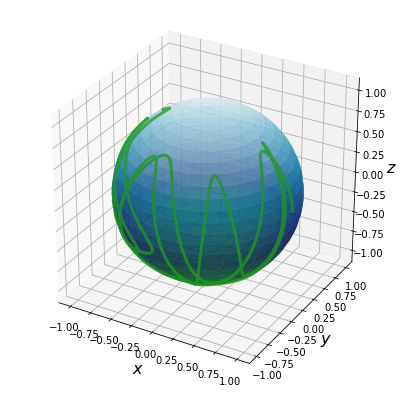

In [49]:
fig = plt.figure()
ax = fig.gca(projection='3d')
x = np.linspace(0,1,200)
y = np.linspace(-1,1,400)
x,y = np.meshgrid(x,y)
# X = 2*cos(2*pi*x)
# Y = 2*sin(2*pi*x)
# Z = 4*y+3
ax.plot_surface(X,Y,Z,alpha=.6,cmap='ocean');
X = sin(pi*x)*cos(pi*y)
Y = sin(pi*x)*sin(pi*y)
Z = cos(pi*x)
ax.plot_surface(X,Y,Z,alpha=.13,cmap='ocean')
for c in 'xyz':
        getattr(ax,f"set_{c}lim")([-1.1,1.1]);    
        getattr(ax,f"set_{c}label")(f"${c}$",size=16)
vs = [np.array((cos(.9*t),-sin(t)**2,sin(4.2*t+.05))) for t in np.linspace(0,3*pi,800)]
xs,ys,zs = np.column_stack([v/norm(v) for v in vs])
plt.plot(xs,ys,zs,zorder=3,lw=3);

<p style="padding-bottom:40%;"> </p>

## Smoothness

A differentiable curve $\vec r (t)$ is said to be **smooth** provided for all $t$, $|\vec r'(t)| \neq 0$.


For such surves we define the **unit tangent vector** $$\vec T(t) = \frac{\vec r'(t)}{|\vec r'(t)|}.$$

In [91]:
r = lambda t: np.array([t**2,t**3])
dr = lambda t: np.array([2*t,3*t**2])


@interact
def _(h=(-1,1,.05)):
    fig = plt.figure(figsize = (7.5,4.5))
    ax = fig.add_subplot(111)
    s = np.linspace(-1,1,300)
    ax.set_autoscale_on(True)
    for c in 'xy':
        getattr(ax,f"set_{c}label")(f"${c}$",size=16)
    X,Y = np.column_stack([r(x) for x in s])
    # make axes lines
    ax.plot(X,Y,alpha=1,lw=3);
    ax.plot([-1,1],[0,0],'k')
    ax.plot([0,0],[-1,1],'k')
    ax.set_title("Differentiable but not smooth")
    v = r(h)-r(0)
    ax.quiver(r(h)[0],r(h)[1],h!=0 and dr(h)[0]/np.linalg.norm(dr(h)) or 0,h!=0 and dr(h)[1]/np.linalg.norm(dr(h)) or 0,angles='xy', scale_units='xy', scale=1)

interactive(children=(FloatSlider(value=0.0, description='h', max=1.0, min=-1.0, step=0.05), Output()), _dom_c…

# Motion in Space

A fundamental application of vector-valued function is describing motion in space. Suppose the **position** of a particle in space at time $t$ is given by $\vec r(t)$. Its derivative $\vec r'(t) = \vec v(t)$ is called the **velocity**, and its second derivative $\vec r''(t) = \vec a(t)$ is the **acceleration**. 

$$\vec a(t) = \vec v'(t) = \vec r''(t) $$

**Speed** is the magnitude of velocity $v = |\vec v(t)|$.

You are likely familiar with Newton's Second Law of motion $$\vec F = m \,\vec a.$$



In [90]:
r1 = lambda t: np.array([t,t**2,t**3])
r2 = lambda t: np.array([cos(2*pi*t),sin(2*pi*t),t])
r3 = lambda t: np.array([cos(8*pi*t),sin(3*pi*t),sin(7*pi*t)])

@interact
def _(t=(-1,1,.05),r={"twist":r1, "helix": r2, "wacky": r3},angle=(-90,120,6),vangle=(0,90,6),osculating_plane=False
     ):
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(111,projection='3d')
    s = np.linspace(-1,1,300)
    ax.view_init(vangle, angle)
    ax.set_autoscale_on(True)
    for c in 'xyz':
        getattr(ax,f"set_{c}lim")([-1,1]);    
        getattr(ax,f"set_{c}label")(f"${c}$",size=16)
    X,Y,Z = np.column_stack([r(x) for x in s])
    # make axes lines
    ax.plot([-1,1],[0,0],[0,0],'k')
    ax.plot([0,0],[-1,1],[0,0],'k')
    ax.plot([0,0],[0,0],[-1,1],'k')
    ax.plot(X,Y,Z,alpha=1,lw=3);
    ax.quiver(0,0,0,r(t)[0],r(t)[1],r(t)[2])
    v = (r(t+.004) - r(t-.004))*250
    v = v/norm(v) # scale for visibility only
    ax.quiver(r(t)[0],r(t)[1],r(t)[2],v[0],v[1],v[2],color="green")
    a = (r(t+.004) - r(t)*2 + r(t-.004))*250**2
    a = a/norm(a) # scale for visibility only
    ax.quiver(r(t)[0],r(t)[1],r(t)[2],a[0],a[1],a[2],color="red")
    if osculating_plane:
#         verts=[r(t) + v + a,r(t) + v - a,r(t) - v - a]
#         ax.add_collection3d(Poly3DCollection(verts,alpha=.3))
#         verts=[r(t) + v + a,r(t) - v - a,r(t) - v + a]
#         ax.add_collection3d(Poly3DCollection(verts,alpha=.3))
        xs,ys,zs = np.column_stack([r(t) + v + a,r(t) + v - a,r(t) - v + a,r(t) - v - a])
        ax.plot_surface(xs.reshape(2,2),ys.reshape(2,2),zs.reshape(2,2),alpha=.3,zorder=.6)

interactive(children=(FloatSlider(value=0.0, description='t', max=1.0, min=-1.0, step=0.05), Dropdown(descript…

<p style="padding-bottom:40%;"> </p>

## Examples

  1. Show that any moving particle that changes direction has a nonzero acceleration.
  2. Is the converse true (i.e., a particle with nonzero acceleration must change direction?

<p style="padding-bottom:40%;"> </p>

So, differentiation moves us "down" the list from position to velocity to acceleration. Then, of course, integration moves us back "up". 

## Integration

Integrals are limits of sums. Vectors can be added and scaled, so this definition also goes right through, though the interpretation is less clear.

$$\int_a^b \vec r(t)\,dt = \lim_{N\to\infty} \sum_{i=1}^N \vec r(t_i^*) \,\Delta t$$

$$ = \left\langle \int_a^b x(t)\,dt, \int_a^b y(t)\,dt ,\int_a^b z(t)\,dt \right\rangle$$ in components. 

## Fundamental Theorem

$$\vec r(t) = \vec r(a) + \int_a^t \vec r'(\tau)\,d\tau$$  

## Example

Find the "range formula". That is, find the distance away an object launched from the ground with speed $v_0$ at an angle $\theta$ will land. 

Leave gravitational acceleration as a constant $g$.

In [92]:
# range of a projectile launched from the ground with angle alpha and speed v ft/sec

@interact
def _(alpha = (0,pi/2),v=(0,100)):
    x=np.linspace(0,10,101)
    plt.figure(figsize=(7,7))
    plt.plot(v*cos(alpha)*x,v*sin(alpha)*x-32*x**2/2)
    plt.ylim([0,160])
    plt.xlim([0,350])

interactive(children=(FloatSlider(value=0.7853981633974483, description='alpha', max=1.5707963267948966), IntS…

<p style="padding-bottom:40%;"> </p>

## Example

A particle initially at rest at the origin is subjected to an acceleration $$\vec a(t) = \begin{cases} \vec i -  t\,\vec j, & t\leq 6 \\ \vec 0, & t > 6 \end{cases}.$$ Find its position at $t=10$.

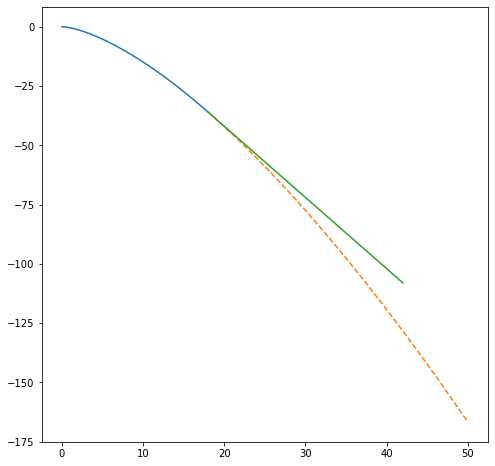

In [9]:
t = np.linspace(0,6,201)
plt.plot(1/2*t**2,-t**3/6)
t = np.linspace(6,10,201)
plt.plot(1/2*t**2,-t**3/6,'--')
plt.plot(18 + 6*(t-6),-36 - 18*(t-6),'-');
